In [1]:
import pandas as pd
import numpy as np
import ta
from ta import add_all_ta_features
from ta.utils import dropna
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# read the sp500 data
df_sp=pd.read_csv("../data/2021-12-06_Top25 SP500 daily.csv")
df_sp.head()

,gvkey,iid,datadate,tic,cusip,conm,div,divd,dvrated,divsppaydate,curcdd,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,exchg,secstat,cik,conml,naics,sic,spcindcd,stko
0,1045,1,20100104,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17441530.0,-4.98,7.72,7.79,7.45,7.73,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
1,1045,1,20100105,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,24044700.0,-4.98,8.36,8.42,7.68,7.68,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
2,1045,1,20100106,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,15770140.0,-4.98,8.11,8.31,8.01,8.11,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
3,1045,1,20100107,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17663110.0,-4.98,8.25,8.50,8.05,8.05,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
4,1045,1,20100108,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,12413430.0,-4.98,8.11,8.42,7.97,8.34,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0


In [3]:
df_sp.columns

Index(['gvkey', 'iid', 'datadate', 'tic', 'cusip', 'conm', 'div', 'divd',
       'dvrated', 'divsppaydate', 'curcdd', 'cshoc', 'cshtrd', 'eps', 'prccd',
       'prchd', 'prcld', 'prcod', 'prcstd', 'exchg', 'secstat', 'cik', 'conml',
       'naics', 'sic', 'spcindcd', 'stko'],
      dtype='object')

### Description Columns
- prco = Price Open
- prcc = Price Close
- prch = Price High
- prcl = Price Low
- cshtrd = Trading Volume
- cshov = Shares Outstanding

In [4]:
df_sp["datadate"] = pd.to_datetime(df_sp["datadate"].astype(str), format='%Y%m%d')

In [5]:
len(df_sp["conm"].unique())

51

In [6]:
len(df_sp["tic"].unique())

82

In [7]:
df_sp = df_sp[["datadate", "conm", "tic", "prcod", "prccd", "prchd", "prcld", "cshtrd"]].rename(columns={"prcod": "Open", "prccd": "Close", "prchd": "High", "prcld": "Low", "cshtrd": "Volume"})

In [8]:
# price trend f closed daily or whole timeframe for american airlines
df_aag = df_sp[(df_sp["conm"]=="AMERICAN AIRLINES GROUP INC") & (df_sp["tic"]=="AAL")]
df_aag = df_aag.drop(columns=["conm", "tic"])
df_aag = df_aag.sort_values(by="datadate")
df_aag.reset_index(inplace=True, drop=True)

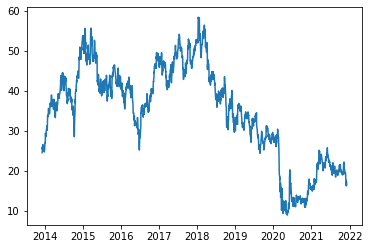

In [9]:
plt.plot(df_aag["datadate"], df_aag["Close"])
plt.show()

In [10]:
df_aag["Close"].isnull().values.any()

False

## All features from python package

In [11]:
df_aag = dropna(df_aag)

In [12]:
df_aag_all_features = df_aag.copy()

In [13]:
df_aag_all_features = add_all_ta_features(df_aag_all_features, open="Open", high="High", low="Low", close="Close", volume="Volume")

C:\Users\Steffen\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Steffen\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [14]:
df_aag_all_features.columns

Index(['datadate', 'Open', 'Close', 'High', 'Low', 'Volume', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_vwap', 'volume_mfi', 'volume_nvi',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_atr', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       '

In [15]:
df_aag_all_features["volume_adi"]

0       6.722686e+06
1       1.113935e+07
2      -1.300387e+06
3      -2.127749e+07
4      -1.127581e+07
            ...     
2007   -1.802406e+09
2008   -1.758809e+09
2009   -1.839072e+09
2010   -1.782483e+09
2011   -1.806136e+09
Name: volume_adi, Length: 2012, dtype: float64

In [16]:
df_aag_all_features[["trend_adx", "trend_adx_pos", "trend_adx_neg"]]

,trend_adx,trend_adx_pos,trend_adx_neg
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
2007,19.560467,16.233553,38.201626
2008,21.387848,15.060200,39.847718
2009,23.485999,12.677429,38.817036
2010,25.497767,11.410728,35.790535


In [17]:
df_aag_all_features[["trend_macd", "trend_macd_signal", "trend_macd_diff"]].iloc[range(24, 35)]

,trend_macd,trend_macd_signal,trend_macd_diff
24,NaN,NaN,NaN
25,0.965276,NaN,NaN
26,1.015614,NaN,NaN
27,1.097723,NaN,NaN
28,1.200598,NaN,NaN
29,1.310593,NaN,NaN
30,1.393802,NaN,NaN
31,1.367326,NaN,NaN
32,1.313452,NaN,NaN
33,1.398268,1.255692,0.142577


In [18]:
ta.trend.SMAIndicator(df_aag["Close"], window=12).sma_indicator()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2007    19.530000
2008    19.226667
2009    18.892500
2010    18.650833
2011    18.382500
Name: sma_12, Length: 2012, dtype: float64

# Signal-Table

In [19]:
df_aag

,datadate,Open,Close,High,Low,Volume
0,2013-12-09,23.95,24.60,25.44,23.4501,43167060.0
1,2013-12-10,24.54,24.88,25.17,24.4100,18648140.0
2,2013-12-11,25.44,25.99,27.20,25.3700,38584270.0
3,2013-12-12,26.20,25.45,26.71,25.4500,19977100.0
4,2013-12-13,25.61,26.23,26.30,25.5201,12189890.0
...,...,...,...,...,...,...
2007,2021-11-29,18.15,17.74,18.26,17.4200,42706490.0
2008,2021-11-30,17.44,17.69,17.74,16.9200,49651400.0
2009,2021-12-01,17.94,16.28,18.24,16.2600,81917470.0
2010,2021-12-02,16.49,17.42,17.44,16.1500,58399490.0


In [20]:
def signal_table(df_stock):
    
    index = 0
    encoding = {}
    
    # Add the typical price
    df_stock['Typical_Price'] = (df_stock['Close'] + df_stock['Low'] + df_stock['High'])/3
    
    # 
    
    # Adding bollinger bands indicators to table
    for window_size in [7, 20, 30, 60]:
        bollinger_bands(df_stock, window=window_size, deviation=2)
        encoding[index] = f"bb_{window_size}_bbli"
        index += 1
    
    return df_stock, encoding

In [21]:
def bollinger_bands(df, window=20, deviation=2):
    # Initialize Bollinger Bands Indicator
    indicator_bb = ta.volatility.BollingerBands(close=df["Close"], window=window, window_dev=deviation)

    # Add Bollinger Bands features
    # df['bb_bbm'] = indicator_bb.bollinger_mavg()
    # df['bb_bbh'] = indicator_bb.bollinger_hband()
    # df['bb_bbl'] = indicator_bb.bollinger_lband()

    # Add Bollinger Band high indicator
    # df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

    # Add Bollinger Band low indicator
    df[f'bb_{window}_bbli'] = indicator_bb.bollinger_lband_indicator()
    
    return df

# Fitness - Net Return
Determine fitness based on:
- genome
- stock
- timeframe

## Fitness Function

- genome = List with indicators that are used in the given individual \[0, 1, 0, 1, 1\]
- df_stock = DataFrame with data for one stock (TODO maybe switch to the whole dataset)
- timeframe = TODO

In [22]:
df_signal, encoding = signal_table(df_aag)

In [23]:
df_signal

,datadate,Open,Close,High,Low,Volume,Typical_Price,bb_7_bbli,bb_20_bbli,bb_30_bbli,bb_60_bbli
0,2013-12-09,23.95,24.60,25.44,23.4501,43167060.0,24.496700,0.0,0.0,0.0,0.0
1,2013-12-10,24.54,24.88,25.17,24.4100,18648140.0,24.820000,0.0,0.0,0.0,0.0
2,2013-12-11,25.44,25.99,27.20,25.3700,38584270.0,26.186667,0.0,0.0,0.0,0.0
3,2013-12-12,26.20,25.45,26.71,25.4500,19977100.0,25.870000,0.0,0.0,0.0,0.0
4,2013-12-13,25.61,26.23,26.30,25.5201,12189890.0,26.016700,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2007,2021-11-29,18.15,17.74,18.26,17.4200,42706490.0,17.806667,0.0,0.0,1.0,1.0
2008,2021-11-30,17.44,17.69,17.74,16.9200,49651400.0,17.450000,0.0,0.0,0.0,1.0
2009,2021-12-01,17.94,16.28,18.24,16.2600,81917470.0,16.926667,0.0,1.0,1.0,1.0
2010,2021-12-02,16.49,17.42,17.44,16.1500,58399490.0,17.003333,0.0,0.0,0.0,1.0


## Genome Encoding

In [24]:
encoding

{0: 'bb_7_bbli', 1: 'bb_20_bbli', 2: 'bb_30_bbli', 3: 'bb_60_bbli'}

In [25]:
def resolve_genome(genome, encoding):
    
    list = []
    index = 0
    
    for gen in genome:
        if gen == 1:
            list.append(encoding[index])
        
        index += 1
    
    return list

In [26]:
n_bits = len(encoding)

In [27]:
genome = np.random.randint(0, 2, n_bits).tolist()
print(genome)

[1, 1, 1, 0]


In [28]:
genome = [0, 0 ,0 ,0]

In [29]:
type(np.random.randint(0, 2, 3).tolist())

list

In [30]:
resolve_genome(genome, encoding)

[]

In [31]:
def buy_signal(index, df_signal, indicators):
    
    signal = True
    
    for ind in indicators:
        if df_signal.iloc[index][ind] != 1.0:
            signal = False
            
            break
            
    return signal

In [32]:
buy_signal(2007, df_signal, ["bb_30_bbli", "bb_60_bbli"])

True

In [33]:
buy_signal(2008, df_signal, ["bb_30_bbli", "bb_60_bbli"])

False

In [34]:
def fitness(genome, df_stock, timeframe):
    
    fitness = 0
    
    df_stock, encoding = signal_table(df_stock)
    
    if len(genome) != len(encoding):
        raise Expetion("The length of the genome and the encoding has to be equal!")
    
    indicators = resolve_genome(genome, encoding)
    
    list_return = []
    list_signal = []

    position = False

    total_return = 0

    transactions = 0
    
    # TODO incorporate the timeframe
    
    for i in df_stock.index:
        
        if((buy_signal(i, df_stock, indicators)) & (position == False)):
        
            position = True
            
            transactions += 1
            
            price_buy = df_stock.iloc[i]["Typical_Price"]
            
            list_signal.append(price_buy)
            
        elif(position == True):
            
            net_return = df_stock.iloc[i]["Typical_Price"] - price_buy
            
            percentage = 0.05
            
            # Close position if it makes 10 % loss or profit
            if((net_return < -(percentage * price_buy)) |
               (net_return > (percentage * price_buy))):
                
                position = False
                
                transactions += 1
                
                total_return += net_return
                
            list_signal.append(None)
            
        else:
            list_signal.append(None)
                
        list_return.append(total_return)
    
    return total_return, list_return, list_signal

In [35]:
buy_signal(3, df_aag, resolve_genome(genome, encoding))

True

In [36]:
total_return, list_return, list_signal = fitness(genome, df_aag, "timeframe")

In [37]:
list_signal

[24.4967,
 None,
 None,
 25.87,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 29.073333333333334,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 31.029999999999998,
 None,
 None,
 None,
 None,
 None,
 33.733333333333334,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 35.053333333333335,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 36.87,
 None,
 None,
 None,
 None,
 None,
 None,
 38.806666666666665,
 None,
 None,
 None,
 None,
 36.396633333333334,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 33.63666666666666,
 None,
 None,
 None,
 35.44,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 38.29,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 41.54676666666666,
 None,
 None,
 None,
 None,
 43.4833

In [38]:
df_aag["total_return"] = list_return
df_aag["signal"] = list_signal

In [39]:
df_aag["signal"]

0       24.496700
1             NaN
2             NaN
3       25.870000
4             NaN
          ...    
2007    17.806667
2008          NaN
2009          NaN
2010          NaN
2011          NaN
Name: signal, Length: 2012, dtype: float64

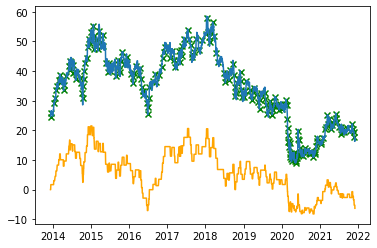

In [40]:
plt.plot(df_aag["datadate"], df_aag["Close"])
plt.scatter(df_aag["datadate"], df_aag["signal"], color="green", marker="x")
plt.plot(df_aag["datadate"], df_aag["total_return"], color="orange")
plt.show()

# Simple Moving Average

In [41]:
df_aag = df_aag.rename(columns={"Open": "prcod", "Close": "prccd", "High": "prchd", "Low": "prcld", "Volume": "cshtrd"})

In [42]:
df_sp = df_sp.rename(columns={"Open": "prcod", "Close": "prccd", "High": "prchd", "Low": "prcld", "Volume": "cshtrd"})

In [43]:
df_aag["moving_average_200"] = df_aag[["prccd"]].rolling(window=200).mean()
df_aag["moving_average_90"] = df_aag[["prccd"]].rolling(window=90).mean()
df_aag["moving_average_30"] = df_aag[["prccd"]].rolling(window=30).mean()
df_aag["moving_average_14"] = df_aag[["prccd"]].rolling(window=14).mean()
df_aag["moving_average_7"] = df_aag[["prccd"]].rolling(window=7).mean()

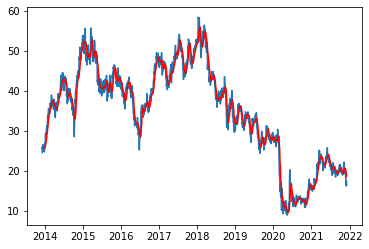

In [44]:
plt.plot(df_aag["datadate"], df_aag["prccd"])
# plt.plot(df_aag["datadate"], df_aag["moving_average_200"], color="red")
# plt.plot(df_aag["datadate"], df_aag["moving_average_90"], color="red")
# plt.plot(df_aag["datadate"], df_aag["moving_average_30"], color="red")
plt.plot(df_aag["datadate"], df_aag["moving_average_14"], color="red")
# plt.plot(df_aag["datadate"], df_aag["moving_average_7"], color="red")
plt.show()

In [45]:
df_buy_signal = df_aag[["datadate", "prccd", "moving_average_200"]].dropna().reset_index()

In [46]:
df_buy_signal.index

RangeIndex(start=0, stop=1813, step=1)

In [47]:
df_buy_signal

,index,datadate,prccd,moving_average_200
0,199,2014-09-24,36.12,36.611298
1,200,2014-09-25,35.21,36.664348
2,201,2014-09-26,35.93,36.719598
3,202,2014-09-29,35.03,36.764798
4,203,2014-09-30,35.48,36.814948
...,...,...,...,...
1808,2007,2021-11-29,17.74,21.236400
1809,2008,2021-11-30,17.69,21.235750
1810,2009,2021-12-01,16.28,21.227200
1811,2010,2021-12-02,17.42,21.225750


In [48]:
print(df_buy_signal.iloc[1702]["prccd"])

21.08


In [49]:
df_buy_signal.iloc[1702]["prccd"] > df_buy_signal.iloc[1702]["moving_average_200"]

True

In [50]:
df_buy_signal.index

RangeIndex(start=0, stop=1813, step=1)

In [51]:
# determine all buy signals

list = []

for i in df_buy_signal.index:
    
    if i-1 in df_buy_signal.index:
        
        # Signal, when the price crosses the sma from below, i.e. the price was below the sma the day before and is now above the sma
        
        if ((df_buy_signal.iloc[i]["prccd"] > df_buy_signal.iloc[i]["moving_average_200"]) & (df_buy_signal.iloc[i-1]["prccd"] < df_buy_signal.iloc[i]["moving_average_200"])):
            
            list.append(df_buy_signal.iloc[i]["prccd"])
            
        else:
            
            list.append(None)

list.append(None)

In [52]:
df_buy_signal["signal"] = list

In [53]:
len(df_buy_signal["signal"].dropna())

27

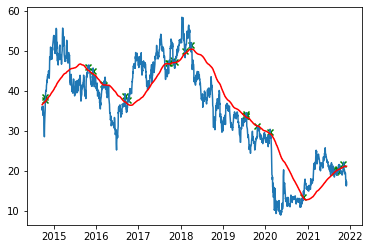

In [54]:
plt.plot(df_buy_signal["datadate"], df_buy_signal["prccd"])
plt.plot(df_buy_signal["datadate"], df_buy_signal["moving_average_200"], color="red")
plt.scatter(df_buy_signal["datadate"], df_buy_signal["signal"], color="green", marker="x")
plt.show()

# Bollinger Bands

Source: https://www.learnpythonwithrune.org/pandas-calculate-and-plot-the-bollinger-bands-for-a-stock/

In [55]:
df_bb = df_aag[["datadate", "prcod", "prccd", "prchd", "prcld"]].dropna().reset_index()

In [56]:
interval = 200
df_bb
df_bb['TP'] = (df_bb['prccd'] + df_bb['prcld'] + df_bb['prchd'])/3
df_bb['std'] = df_bb['TP'].rolling(interval).std(ddof=0)
df_bb['MA-TP'] = df_bb['TP'].rolling(interval).mean()
df_bb['BOLU'] = df_bb['MA-TP'] + 2*df_bb['std']
df_bb['BOLD'] = df_bb['MA-TP'] - 2*df_bb['std']
df_bb.dropna(inplace=True)

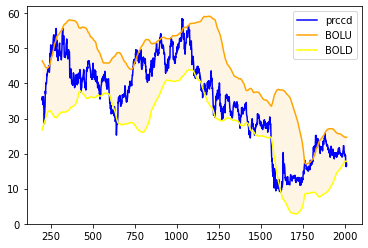

In [57]:
ax = df_bb[['prccd', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(df_bb.index, df_bb['BOLD'], df_bb['BOLU'], facecolor='orange', alpha=0.1)
plt.show()
# TODO: Index anpassen ist bisher nur ein Integer, Datetime wäre besser

# Calculating Returns

In [58]:
def net_return(df, ticker, date_buy, date_sell):
    
    course = "prco"
    
    price_buy = df_sp[(df_sp["tic"] == ticker) & (df_sp["datadate"] == date_buy)]["prcod"].values[0]
    
    price_sell = df_sp[(df_sp["tic"] == ticker) & (df_sp["datadate"] == date_sell)]["prcod"].values[0]
    
    return price_sell - price_buy

In [59]:
df_sp[(df_sp["tic"] == "AAL") & (df_sp["datadate"] == "2021-11-30")]["prcod"].values[0]

17.44

In [60]:
net_return(df_sp, "AAL", "2021-11-15", "2021-11-30")

-2.9599999999999973

# Returns on given rulset

In [61]:
df_buy_signal

,index,datadate,prccd,moving_average_200,signal
0,199,2014-09-24,36.12,36.611298,NaN
1,200,2014-09-25,35.21,36.664348,NaN
2,201,2014-09-26,35.93,36.719598,NaN
3,202,2014-09-29,35.03,36.764798,NaN
4,203,2014-09-30,35.48,36.814948,NaN
...,...,...,...,...,...
1808,2007,2021-11-29,17.74,21.236400,NaN
1809,2008,2021-11-30,17.69,21.235750,NaN
1810,2009,2021-12-01,16.28,21.227200,NaN
1811,2010,2021-12-02,17.42,21.225750,NaN


In [62]:
list = []

position = False

total_return = 0

transactions = 0

for i in df_buy_signal.index:
    
    if i-1 in df_buy_signal.index:
        
        # Signal, when the price crosses the sma from below, i.e. the price was below the sma the day before and is now above the sma
        if ((df_buy_signal.iloc[i]["prccd"] > df_buy_signal.iloc[i]["moving_average_200"]) &
            (df_buy_signal.iloc[i-1]["prccd"] < df_buy_signal.iloc[i]["moving_average_200"]) &
            (position == False)):
            
            position = True
            
            transactions += 1
            
            price_buy = df_buy_signal.iloc[i]["prccd"]
            
        elif(position == True):
            
            net_return = df_buy_signal.iloc[i]["prccd"] - price_buy
            
            percentage = 0.05
            
            # Close position if it makes 10 % loss or profit
            if((net_return < -(percentage * price_buy)) |
               (net_return > (percentage * price_buy))):
                
                position = False
                
                transactions += 1
                
                total_return += net_return
                
    list.append(total_return)

print(position)

print(transactions)

False
34


In [63]:
print("Return using the 200 day moving average as indicator: " + str(list[len(list)-1]))

Return using the 200 day moving average as indicator: -7.689999999999996


In [64]:
print("Return using a buy and hold approach: " + str(df_buy_signal.iloc[len(df_buy_signal)-1]["prccd"] - df_buy_signal.iloc[0]["prccd"]))

Return using a buy and hold approach: -19.499999999999996


In [65]:
df_buy_signal["total_return"] = list

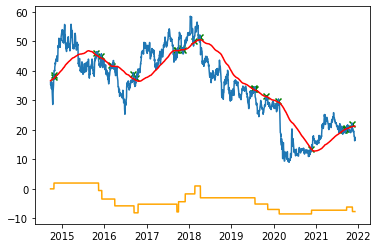

In [66]:
plt.plot(df_buy_signal["datadate"], df_buy_signal["prccd"])
plt.plot(df_buy_signal["datadate"], df_buy_signal["moving_average_200"], color="red")
plt.scatter(df_buy_signal["datadate"], df_buy_signal["signal"], color="green", marker="x")
plt.plot(df_buy_signal["datadate"], df_buy_signal["total_return"], color="orange")
plt.show()